In [5]:
import xarray as xr
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

import FaIR data

In [7]:
ds_fair=xr.open_dataset('SCM_data/timeseries/flat10_FaIR.nc')

import MAGICC data

In [8]:
ds_magicc=xr.open_dataset('SCM_data/timeseries/flat10_magicc.nc')

In [9]:
ds_cicero=xr.open_dataset('SCM_data/timeseries/flat10_CICEROSCM.nc')

In [21]:
def plot_range(SampleData,ax1,col='steelblue'):
 prctl=[5,25,50,75,95]
 SDist=np.percentile(SampleData,prctl,axis=1).T

 x=np.arange(0,len(pd.DatetimeIndex(SampleData.time).year))
 #ax1.plot(x, SDist[:,2],)
 for i in range(3):
     alph=0.15+(i/len(prctl))
     ax1.fill_between(x,SDist[:,0+i], SDist[:,4-i], color=col, alpha=alph)
 return SDist

In [11]:
ds_cicero.scenario

<xarray.DataArray 'scenario' (scenario: 4)>
array(['flat10', 'flat10_zec', 'flat10_cdr', 'esm-piControl'], dtype=object)
Coordinates:
  * scenario  (scenario) object 'flat10' 'flat10_zec' ... 'esm-piControl'

In [12]:
ds_fair.keys()

KeysView(<xarray.Dataset>
Dimensions:            (config: 1001, time: 321, scenario: 3)
Coordinates:
  * config             (config) int32 1230 1715 2658 ... 1497041 1497105 1498424
  * time               (time) int32 0 1 2 3 4 5 6 ... 315 316 317 318 319 320
  * scenario           (scenario) object 'esm-flat10' ... 'esm-flat10_cdr'
Data variables:
    ecs                (config) float64 ...
    tcr                (config) float64 ...
    tcre               (config) float64 ...
    zec50              (config) float64 ...
    zec100             (config) float64 ...
    zec200             (config) float64 ...
    tr1000             (config) float64 ...
    tr0                (config) float64 ...
    tpw                (config) int32 ...
    temperature        (time, scenario, config) float64 ...
    co2_concentration  (time, scenario, config) float64 ...
    airborne_fraction  (time, scenario, config) float64 ...)

In [13]:
ds_magicc.keys()

KeysView(<xarray.Dataset>
Dimensions:                          (time: 316, scenario: 3, ensemble_member: 600)
Coordinates:
  * time                             (time) datetime64[ns] 1850-01-01 ... 216...
  * scenario                         (scenario) object 'flat10' ... 'flat10_zec'
  * ensemble_member                  (ensemble_member) object '0' '1' ... '99'
Data variables:
    Atmospheric_Concentrations__CO2  (scenario, ensemble_member, time) float64 ...
    Surface_Air_Temperature_Change   (scenario, ensemble_member, time) float64 ...
Attributes:
    scmdata_metadata_climate_model:  MAGICCv7.5.3
    scmdata_metadata_region:         World
    scmdata_metadata_model:          idealised
    created_at:                      2023-10-24T13:45:25.348212
    _scmdata_version:                0.16.1)

In [14]:
ds_magicc=ds_magicc.rename_vars(name_dict={'Atmospheric_Concentrations__CO2':'co2_concentration'})
ds_magicc=ds_magicc.rename_vars(name_dict={'Surface_Air_Temperature_Change':'temperature'})
ds_magicc=ds_magicc.rename_dims(dims_dict={'ensemble_member':'config'})


In [15]:
ds_fair.scenario

<xarray.DataArray 'scenario' (scenario: 3)>
array(['esm-flat10', 'esm-flat10_zec', 'esm-flat10_cdr'], dtype=object)
Coordinates:
  * scenario  (scenario) object 'esm-flat10' 'esm-flat10_zec' 'esm-flat10_cdr'

In [16]:
ds_magicc["scenario"]=("scenario",['esm-flat10','esm-flat10_cdr','esm-flat10_zec'])

In [17]:
ds_cicero["scenario"]=("scenario",['esm-flat10','esm-flat10_zec','esm-flat10_cdr','esm-piControl'])

(0.0, 320.0)

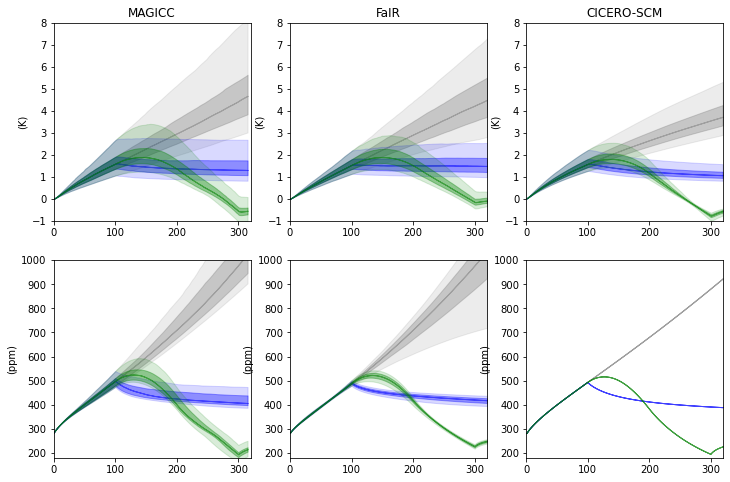

In [22]:
fig = plt.figure(figsize=[12,8])

ax1 = fig.add_subplot(2,3,1)

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10').T,ax1,col='grey')
plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_zec').T,ax1,col='blue')
plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').T,ax1,col='green')
ax1.set_title('MAGICC')
ax1.set_ylabel('(K)')
ax1.set_ylim([-1,8])
ax1.set_xlim([0,320])


ax2 = fig.add_subplot(2,3,2)

plot_range(ds_fair.temperature.sel(scenario='esm-flat10'),ax2,col='grey')
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_zec'),ax2,col='blue')
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_cdr'),ax2,col='green')
ax2.set_title('FaIR')
ax2.set_ylabel('(K)')
ax2.set_ylim([-1,8])
ax2.set_xlim([0,320])

ax3 = fig.add_subplot(2,3,3)

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10'),ax3,col='grey')
plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_zec'),ax3,col='blue')
plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_cdr'),ax3,col='green')
ax3.set_title('CICERO-SCM')
ax3.set_ylabel('(K)')
ax3.set_ylim([-1,8])
ax3.set_xlim([0,320])

ax4 = fig.add_subplot(2,3,4)

plot_range(ds_magicc.co2_concentration.sel(scenario='esm-flat10').T,ax4,col='grey')
plot_range(ds_magicc.co2_concentration.sel(scenario='esm-flat10_zec').T,ax4,col='blue')
plot_range(ds_magicc.co2_concentration.sel(scenario='esm-flat10_cdr').T,ax4,col='green')
ax4.set_ylabel('(ppm)')
ax4.set_ylim([180,1000])
ax4.set_xlim([0,320])

ax5= fig.add_subplot(2,3,5)

plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10'),ax5,col='grey')
plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10_zec'),ax5,col='blue')
plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10_cdr'),ax5,col='green')
ax5.set_ylabel('(ppm)')
ax5.set_ylim([180,1000])
ax5.set_xlim([0,320])

ax6 = fig.add_subplot(2,3,6)

plot_range(ds_cicero.co2_concentration.sel(scenario='esm-flat10'),ax6,col='grey')
plot_range(ds_cicero.co2_concentration.sel(scenario='esm-flat10_zec'),ax6,col='blue')
plot_range(ds_cicero.co2_concentration.sel(scenario='esm-flat10_cdr'),ax6,col='green')
ax6.set_ylabel('(ppm)')
ax6.set_ylim([180,1000])
ax6.set_xlim([0,320])




In [23]:
e_flat10=pd.read_csv('flat10.csv',header=4)
e_flat10_cdr=pd.read_csv('flat10_cdr.csv',header=4)
e_flat10_zec=pd.read_csv('flat10_zec.csv',header=4)


In [24]:
def extd(ts,leng):
    out=np.zeros(leng)
    if leng>len(ts):
        out[:len(ts)]=ts.values
        out[len(ts):]=ts.iloc[-1]
    else:
        out=ts[:leng]
    return out

In [25]:
e_flat10['Emission Rate (PgC a-1)']

0      10.0
1      10.0
2      10.0
3      10.0
4      10.0
       ... 
145    10.0
146    10.0
147    10.0
148    10.0
149    10.0
Name: Emission Rate (PgC a-1), Length: 150, dtype: float64

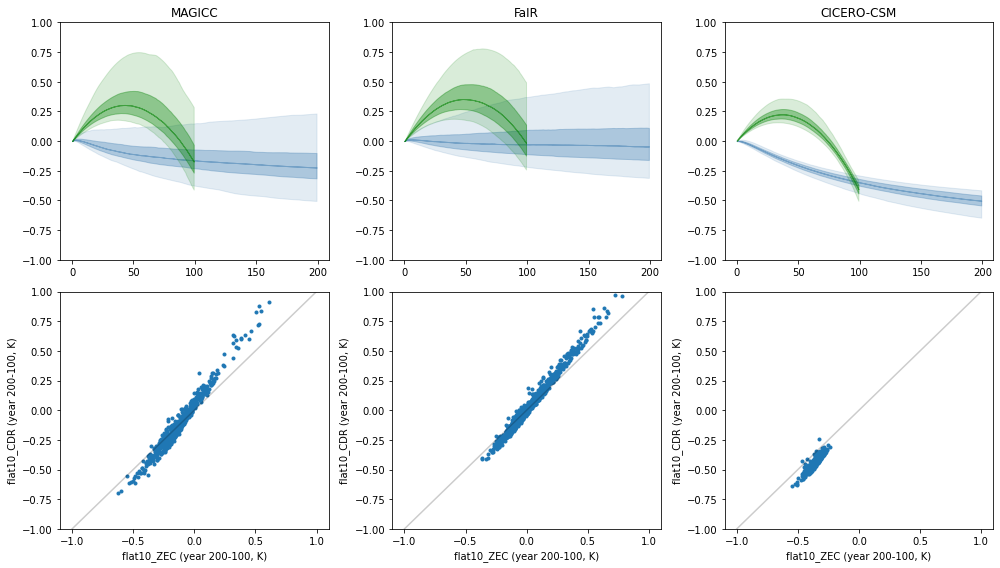

In [28]:
fig = plt.figure(figsize=[14,8])

m_100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100).T
m_100pl=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T
m_100plc=ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200)).T

ax1 = fig.add_subplot(2,3,1)
ax1.set_ylim([-1,1])
ax1.set_title('MAGICC')
plot_range(m_100pl-m_100,ax1)
plot_range(m_100plc-m_100,ax1,'g')

t_100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
t_100pl=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
t_100plc=ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,3,2)
ax2.set_ylim([-1,1])
ax2.set_title('FaIR')

plot_range(t_100pl-t_100,ax2)
plot_range(t_100plc-t_100,ax2,'g')

c_100=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
c_100pl=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
c_100plc=ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,3,3)
ax2.set_ylim([-1,1])
ax2.set_title('CICERO-CSM')

plot_range(c_100pl-c_100,ax2)
plot_range(c_100plc-c_100,ax2,'g')

ax3 = fig.add_subplot(2,3,4)

ax3.plot(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-m_100,ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-m_100,'.')
ax3.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax3.set_xlabel('flat10_ZEC (year 200-100, K)')
ax3.set_ylabel('flat10_CDR (year 200-100, K)')
ax3.set_ylim([-1,1])

ax4 = fig.add_subplot(2,3,5)

ax4.plot(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-t_100,ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-t_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])

ax4 = fig.add_subplot(2,3,6)

ax4.plot(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-c_100,ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-c_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])
plt.tight_layout()

In [31]:
fair_metrics=pd.read_csv('SCM_data/metrics/FaIR_metrics.csv',index_col=0)
magicc_metrics=pd.read_csv('SCM_data/metrics/MAGICC_metrics.csv',index_col=0)


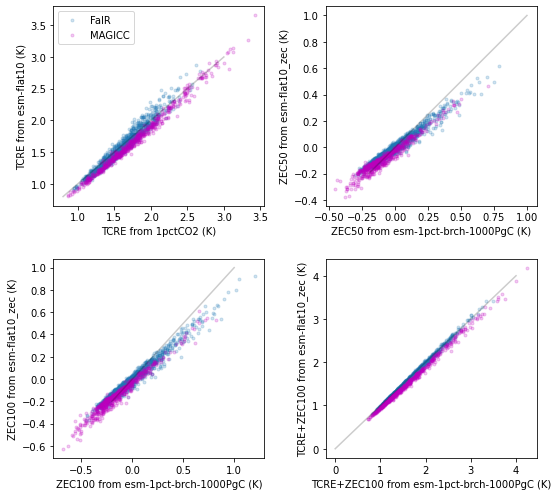

In [33]:
fig = plt.figure(figsize=[8,7])

t_100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
m_100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

ax1 = fig.add_subplot(2,2,1)

p1=ax1.plot(fair_metrics['tcre'],t_100,'.',alpha=0.2)
p2=ax1.plot(magicc_metrics['tcre_1pctco2'],m_100,'.',color='m',alpha=0.2)

ax1.plot([0.8,3],[.8,3],'k-',alpha=0.2)
ax1.set_ylabel('TCRE from esm-flat10 (K)')
ax1.set_xlabel('TCRE from 1pctCO2 (K)')

ax1.legend([p1[0],p2[0]],['FaIR','MAGICC'])

ax2 = fig.add_subplot(2,2,2)

z50=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
m50=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

ax2.plot(fair_metrics['zec50'],ds_fair.zec50,'.',alpha=0.2)
ax2.plot(magicc_metrics['zec50_esm-1pct-brch-1000pgc'],m50,'.',color='m',alpha=0.2)

ax2.plot([-.2,1],[-.2,1],'k-',alpha=0.2)
ax2.set_ylabel('ZEC50 from esm-flat10_zec (K)')
ax2.set_xlabel('ZEC50 from esm-1pct-brch-1000PgC (K)')

ax3 = fig.add_subplot(2,2,3)
z100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
m100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
ax3.plot(fair_metrics['zec100'],ds_fair.zec100,'.',alpha=0.2)

ax3.plot(magicc_metrics['zec100_esm-1pct-brch-1000pgc'],m100,'.',color='m',alpha=0.2)
ax3.plot([-.2,1],[-.2,1],'k-',alpha=0.2)
ax3.set_ylabel('ZEC100 from esm-flat10_zec (K)')
ax3.set_xlabel('ZEC100 from esm-1pct-brch-1000PgC (K)')

ax4 = fig.add_subplot(2,2,4)
z100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
ax4.plot(fair_metrics['zec100']+fair_metrics['tcre'],ds_fair.zec100+ds_fair.tcre,'.',alpha=0.2)
ax4.plot(magicc_metrics['zec100_esm-1pct-brch-1000pgc']+magicc_metrics['tcre_1pctco2'],m100+m_100,'.',color='m',alpha=0.2)

ax4.plot([0,4],[0,4],'k-',alpha=0.2)
ax4.set_ylabel('TCRE+ZEC100 from esm-flat10_zec (K)')
ax4.set_xlabel('TCRE+ZEC100 from esm-1pct-brch-1000PgC (K)')

plt.tight_layout()


In [34]:
ds_fair.co2_concentration.sel(scenario='esm-flat10')[0,0]

<xarray.DataArray 'co2_concentration' ()>
array(284.316999)
Coordinates:
    config    int32 1230
    time      int32 0
    scenario  <U10 'esm-flat10'

In [35]:
max_co2 = ds_fair.time.where(ds_fair.co2_concentration > 284.3*2).min(dim="time")
tcr_flat10_fair=ds_fair.sel(time=max_co2.fillna(0).astype(int)).where(max_co2.notnull()).temperature.values[0,:]

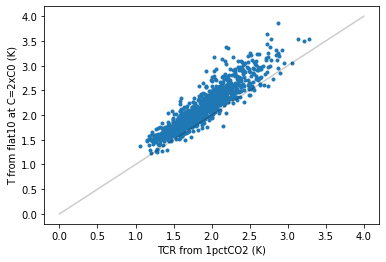

In [38]:
plt.plot(ds_fair['tcr'],tcr_flat10,'.')
plt.xlabel('TCR from 1pctCO2 (K)')
plt.ylabel('T from flat10 at C=2xC0 (K)')
plt.plot([0,4],[0,4],'k-',alpha=0.2)


In [246]:
mdls=['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM']
expt=['esm-pictrl','1pctco2','flat10','flat10-zec','flat10-cdr']
flds=['tas','co2','nbp','fgco2']

In [247]:
import os

In [383]:
ed={}
for m in mdls:
    ed[m]={}
    for e in expt:
        tmpa=[]
        for f in flds:

                fl10='ESM_data/'+m+'/'+'flat10'+'_'+f+'_'+m+'.nc'
                fl='ESM_data/'+m+'/'+e+'_'+f+'_'+m+'.nc'
                if os.path.exists(fl) and os.path.exists(fl10):
                    otmp=xr.open_dataset(fl)
                    otmp10=xr.open_dataset(fl10)
                    if 'nep' in list(otmp.keys()):
                        otmp=otmp.rename_vars({"nep": "nbp"})
                    if 'nep' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"nep": "nbp"})
                    tmp=otmp.copy(deep=True)
                    tmp10=otmp10.copy(deep=True)
                    if e=='flat10':
                        if len(tmp.time)<1000:
                            tmp.coords['time']=pd.date_range('1700-01-01', periods=tmp['time'].values.shape[0],freq='Y')
                        else:
                            tmp.coords['time']=pd.date_range('1700-01-01', periods=tmp['time'].values.shape[0],freq='M')
                        tmp=tmp[f]    
                    else: 
                        if len(tmp.time)<1000:
                            tmp10.coords['time']=pd.date_range('1700-01-01', periods=tmp10['time'].values.shape[0],freq='Y')
                            tmp.coords['time']=pd.date_range('1800-01-01', periods=tmp['time'].values.shape[0],freq='Y')
                        else:
                            tmp10.coords['time']=pd.date_range('1700-01-01', periods=tmp10['time'].values.shape[0],freq='M')
                            tmp.coords['time']=pd.date_range('1800-01-01', periods=tmp['time'].values.shape[0],freq='M')
  
                        tmp=xr.concat((tmp10.where(tmp10['time.year'] < 1800, drop=True)[f],tmp[f]),'time')
                    tmp=tmp.groupby('time.year').mean()
                    if len(tmp.shape)==3:
                        tmp=tmp.sel(lat=0).sel(lon=0).drop('lat').drop('lon')
                    tmpa.append(tmp)
                else:
                    print(m+e+f)

        ed[m][e]=xr.merge(tmpa)
                
                

ACCESS-ESM1-5esm-pictrltas
ACCESS-ESM1-5esm-pictrlco2
ACCESS-ESM1-5esm-pictrlnbp
ACCESS-ESM1-5esm-pictrlfgco2
ACCESS-ESM1-51pctco2tas
ACCESS-ESM1-51pctco2co2
ACCESS-ESM1-51pctco2nbp
ACCESS-ESM1-51pctco2fgco2


/home/sanderson/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/sanderson/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


/home/sanderson/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/sanderson/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/home/sanderson/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/sanderson/anaco

CESM2esm-pictrltas
CESM2esm-pictrlco2
CESM2esm-pictrlnbp
CESM2esm-pictrlfgco2
CESM21pctco2tas
CESM21pctco2co2
CESM21pctco2nbp
CESM21pctco2fgco2
CESM2flat10co2
CESM2flat10-zecco2
CESM2flat10-cdrco2
GFDL-ESM4esm-pictrltas
GFDL-ESM4esm-pictrlco2
GFDL-ESM4esm-pictrlnbp
GFDL-ESM4esm-pictrlfgco2
GFDL-ESM41pctco2tas
GFDL-ESM41pctco2co2
GFDL-ESM41pctco2nbp
GFDL-ESM41pctco2fgco2
GFDL-ESM4flat10fgco2
GFDL-ESM4flat10-zecfgco2
GFDL-ESM4flat10-cdrfgco2
NorESM2-LM1pctco2tas
NorESM2-LM1pctco2co2
NorESM2-LM1pctco2nbp
NorESM2-LM1pctco2fgco2


In [384]:
tmp

<xarray.DataArray 'fgco2' (year: 320)>
array([-11.32565115,  -5.94237259,  -3.5461828 ,  -2.13428863,
        -1.30443502,  -0.46711101,  -0.14542002,   0.32446538,
         0.59290089,   0.81973488,   0.95096086,   1.09403732,
         1.47142989,   1.44003261,   1.54137577,   1.62704353,
         1.85229585,   2.4112949 ,   2.51964963,   2.67024094,
         2.66222734,   2.67293934,   2.65324033,   2.61207277,
         2.56806452,   2.62292446,   2.62610066,   2.6660484 ,
         2.71534542,   2.73983127,   2.6992662 ,   2.71962953,
         2.71684842,   2.76003842,   2.84499989,   3.01499738,
         2.82542913,   2.74453377,   2.70865699,   2.72975195,
         2.85656948,   2.81086164,   2.8387965 ,   2.67279654,
         2.73406197,   2.87218195,   2.74551019,   2.85980452,
         2.71870133,   2.76617994,   2.85385187,   2.77240559,
         2.71901026,   2.60472354,   2.85407557,   2.7791529 ,
         2.77838309,   2.77112473,   2.71640355,   2.86758371,
         2.9062645 ,   2.85732908,   2.9010883 ,   2.90267605,
         2.76569548,   2.75325464,   2.88990619,   2.87245827,
         2.86238334,   2.90474656,   2.89351434,   2.87456726,
         2.80674616,   2.90021967,   2.76497958,   2.83663829,
         3.05773587,   2.89110159,   2.96824998,   2.85571166,
...
        -2.19451428,  -2.21961667,  -2.21361344,  -2.37175125,
        -2.20666498,  -2.31990828,  -2.23635796,  -2.34433511,
        -2.31355686,  -2.2221875 ,  -2.32462711,  -2.47367675,
        -2.48774369,  -2.43810568,  -2.40047352,  -2.3630007 ,
        -2.42643669,  -2.42054286,  -2.43400362,  -2.52069067,
        -2.31786236,  -2.34031365,  -2.50590657,  -2.44534591,
        -2.43125006,  -2.58448282,  -2.61337477,  -2.57483256,
        -2.68738381,  -2.64908871,  -2.7464632 ,  -2.47658659,
        -2.42299948,  -2.52444236,  -2.42306561,  -2.44377071,
        -2.4473652 ,  -2.44066311,  -2.42874547,  -2.53443328,
        -2.66335257,  -2.53284761,  -2.6316146 ,  -2.62350276,
        -2.64673362,  -2.76143559,  -2.83717852,  -2.60681617,
        -2.5699087 ,  -2.6364234 ,  -2.69214605,  -2.63709945,
        -2.70446186,  -2.69907032,  -2.79634721,  -2.63080911,
        -2.75505046,  -2.69118423,  -2.8398237 ,  -2.70563596,
        -2.29392471,  -1.84957854,  -1.2978395 ,  -1.01637837,
        -0.91761079,  -0.78083117,  -0.6962337 ,  -0.41984932,
        -0.59650267,  -0.4140419 ,  -0.34892043,  -0.3170434 ,
        -0.36217515,  -0.23947201,  -0.2277396 ,  -0.17511802,
        -0.2378787 ,  -0.22468138,  -0.1634202 ,  -0.23068676])
Coordinates:
  * year     (year) int64 1700 1701 1702 1703 1704 ... 2015 2016 2017 2018 2019

ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM


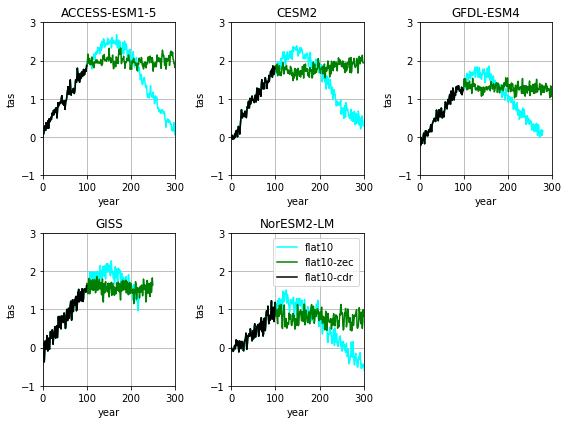

In [385]:
fig, axs = plt.subplots(2, 3,figsize=[8,6])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    try:
        (ed[m]['flat10-cdr']['tas']-ed[m]['flat10']['tas'][0]).plot(color='cyan',ax=axs[i],label='flat10')
    except:
        print('fail cdr')
    try:
        (ed[m]['flat10-zec']['tas']-ed[m]['flat10']['tas'][0]).plot(color='green',ax=axs[i],label='flat10-zec')
    except:
        print('fail zec')
    (ed[m]['flat10']['tas'][:100]-ed[m]['flat10']['tas'][0]).plot(color='k',ax=axs[i],label='flat10-cdr')

    axs[i].set_title(m)
    axs[i].set_ylim([-1,3])
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1900,2000])
    axs[i].set_xticklabels([0,100,200,300])
    axs[i].grid()
axs[5].set_axis_off()
plt.tight_layout()
axs[4].legend()
    


ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM


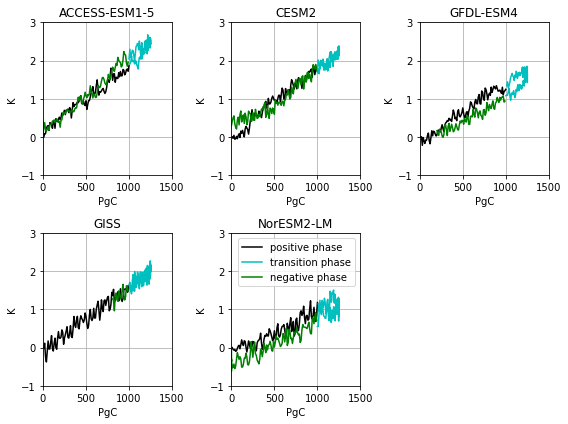

In [392]:
fig, axs = plt.subplots(2, 3,figsize=[8,6])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    tz=ed[m]['flat10']['tas'][0]
    cumem=np.cumsum(extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m]['flat10-cdr']['tas'])))
    axs[i].plot(cumem[:100],ed[m]['flat10-cdr']['tas'][:100]-tz,'k',label='positive phase')
    axs[i].plot(cumem[100:200],ed[m]['flat10-cdr']['tas'][100:200]-tz,'c',label='transition phase')
    axs[i].plot(cumem[200:],ed[m]['flat10-cdr']['tas'][200:]-tz,'g',label='negative phase')
    axs[i].set_title(m)
    axs[i].set_ylim([-1,3])
    axs[i].set_xlim([0,1500])
    axs[i].set_xlabel('PgC')
    axs[i].set_ylabel('K')
    
    axs[i].grid()
    

axs[5].set_axis_off()
plt.tight_layout()
axs[4].legend()



In [378]:
len(ed[m]['flat10-cdr']['tas'].shape)

3

In [376]:
ed[m]['flat10-cdr']['tas'].sel(lat=0).sel(lon=0).drop('lat').drop('lon')

<xarray.DataArray 'tas' (year: 320)>
array([287.52164, 287.60745, 287.60928, 287.74112, 287.8038 , 287.8178 ,
       287.69427, 287.89755, 287.8748 , 287.8571 , 287.7506 , 287.91232,
       287.95132, 287.74966, 288.001  , 287.9613 , 287.92325, 287.9888 ,
       288.0401 , 287.97598, 288.03763, 288.1498 , 288.08456, 288.14957,
       288.2196 , 288.10596, 288.22345, 288.21414, 288.25256, 288.16122,
       288.29092, 288.24863, 288.01953, 288.21912, 288.421  , 288.31915,
       288.37442, 288.3689 , 288.38898, 288.43842, 288.41867, 288.46243,
       288.5626 , 288.60403, 288.3982 , 288.3882 , 288.46796, 288.37094,
       288.34793, 288.46918, 288.24484, 288.36795, 288.47162, 288.4762 ,
       288.56912, 288.67514, 288.7583 , 288.8403 , 288.65286, 288.63632,
       288.69482, 288.87308, 289.01736, 288.77557, 288.61697, 288.7091 ,
       288.69666, 288.72952, 288.77258, 288.79248, 288.7137 , 288.6613 ,
       288.70694, 288.81296, 289.01624, 289.01712, 288.9515 , 289.09848,
       289.32312, 289.20572, 289.0061 , 289.1738 , 289.17807, 288.9551 ,
       289.08707, 289.0737 , 289.0518 , 289.20386, 289.09747, 289.23563,
       289.12067, 289.12613, 289.29025, 289.2709 , 289.1484 , 289.19363,
       289.28125, 289.30118, 289.24203, 289.39447, 289.43405, 289.47537,
       289.64218, 289.50247, 289.492  , 289.52634, 289.43472, 289.49496,
       289.50867, 289.41   , 289.36774, 289.30273, 289.49686, 289.608  ,
       289.61517, 289.5623 , 289.69943, 289.56985, 289.5686 , 289.6774 ,
...
       289.68552, 289.75858, 289.53748, 289.38568, 289.35596, 289.4778 ,
       289.48645, 289.53433, 289.6052 , 289.3964 , 289.44714, 289.3431 ,
       289.23834, 289.28342, 289.35007, 289.2369 , 289.14566, 289.0207 ,
       289.0856 , 289.16055, 289.00552, 288.9099 , 288.89273, 288.93585,
       289.02402, 289.0793 , 289.07596, 288.9824 , 288.8666 , 288.8124 ,
       288.83554, 288.87115, 288.67215, 288.56113, 288.55576, 288.63016,
       288.6459 , 288.5435 , 288.67935, 288.6932 , 288.86258, 288.66135,
       288.60016, 288.63135, 288.55164, 288.60342, 288.69427, 288.57388,
       288.51465, 288.39066, 288.42972, 288.59824, 288.56113, 288.4844 ,
       288.56223, 288.41226, 288.2797 , 288.28583, 288.25735, 288.18668,
       288.1812 , 288.23288, 288.21182, 288.13983, 288.1921 , 288.21536,
       288.2078 , 288.24097, 288.2172 , 288.12952, 288.1367 , 288.18124,
       288.12808, 287.9714 , 287.9634 , 287.77707, 287.9299 , 287.90564,
       287.95038, 287.99606, 287.95596, 287.90225, 287.96957, 287.94067,
       287.93936, 287.8538 , 287.85367, 287.86243, 287.69638, 287.78397,
       287.72662, 287.67438, 287.7231 , 287.89688, 287.74817, 287.58313,
       287.6825 , 287.7976 , 287.8988 , 287.85   , 287.87253, 287.76767,
       287.7097 , 287.6826 , 287.86398, 287.9318 , 287.79553, 287.76532,
       287.86423, 287.83362, 287.7733 , 287.76364, 287.88004, 287.79678,
       287.72983, 287.77612], dtype=float32)
Coordinates:
    height   float64 2.0
  * year     (year) int64 1700 1701 1702 1703 1704 ... 2015 2016 2017 2018 2019
    depth    float64 0.0

Text(0.5, 1.0, 'MAGICC, CDR')

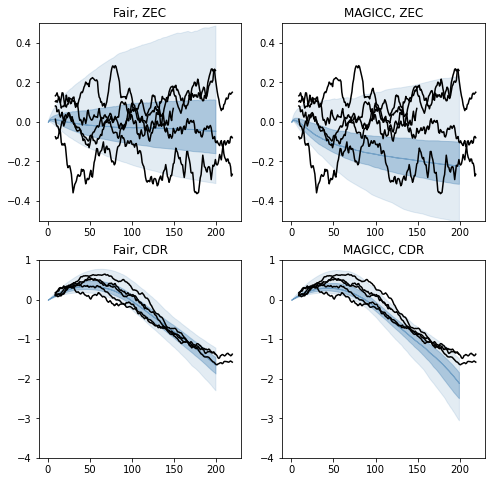

In [418]:
fig, axs = plt.subplots(2, 2,figsize=[8,8])
axs=axs.flatten()
plot_range(t_100pl-t_100,axs[0])
for i,m in enumerate(mdls):
    axs[0].plot(ed[m]['flat10-zec']['tas'][100:].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),'k')
axs[0].set_ylim([-.5,.5])
axs[0].set_title('Fair, ZEC')

plot_range(m_100pl-m_100,axs[1])
for i,m in enumerate(mdls):
    axs[1].plot(ed[m]['flat10-zec']['tas'][100:].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),'k')
    axs[1].set_ylim([-.5,.5])
axs[1].set_title('MAGICC, ZEC')

plot_range(ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-t_100,axs[2])
for i,m in enumerate(mdls):
    axs[2].plot(ed[m]['flat10-cdr']['tas'][100:].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),'k')
axs[2].set_ylim([-4,1])
axs[2].set_title('Fair, CDR')

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-m_100,axs[3])
for i,m in enumerate(mdls):
    axs[3].plot(ed[m]['flat10-cdr']['tas'][100:].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),'k')
    axs[3].set_ylim([-4,1])
axs[3].set_title('MAGICC, CDR')
    

In [415]:
ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-t_100

<xarray.DataArray 'temperature' (config: 1001, time: 200)>
array([[ 0.        ,  0.01510552,  0.03003313, ..., -2.36343658,
        -2.38397004, -2.40450169],
       [ 0.        ,  0.00979137,  0.01943004, ..., -1.33710504,
        -1.34857415, -1.36000596],
       [ 0.        ,  0.02761674,  0.05510551, ..., -1.94110956,
        -1.97392186, -2.00682065],
       ...,
       [ 0.        ,  0.02013002,  0.04008136, ..., -1.92009262,
        -1.94028455, -1.96049177],
       [ 0.        ,  0.0141057 ,  0.02798275, ..., -1.81867118,
        -1.83468702, -1.85066602],
       [ 0.        ,  0.02190703,  0.04367685, ..., -2.34765815,
        -2.37375573, -2.39984786]])
Coordinates:
  * config   (config) int32 1230 1715 2658 3898 ... 1497041 1497105 1498424
  * time     (time) int32 100 101 102 103 104 105 ... 294 295 296 297 298 299